## Polska - główne kierunki emigracji i imigracji w Europie w 2022 roku
Dane dotyczą osób wymeldowanych z pobytu stałego w Polsce (emigracja) oraz zameldowanych na pobyt stały w Polsce (imigracja).  
Źródła danych:  
- https://stat.gov.pl/obszary-tematyczne/ludnosc/migracje-zagraniczne-ludnosci/glowne-kierunki-emigracji-i-imigracji-na-pobyt-staly-w-latach-1966-2022,4,2.html  
- https://databank.worldbank.org/reports.aspx?source=2&series=SP.POP.TOTL&country=#

In [2]:
import networkx as nx

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import geopandas as gpd 
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from shapely.ops import unary_union

In [3]:
df = pd.read_excel('kierunki_migracji_polska_2022_eu.xlsx')
df.head()

,KRAJ,EMI,IMI
0,Austria,445,299
1,Belgia,224,292
2,Białoruś,1,1306
3,Bułgaria,14,87
4,Cypr,19,6


In [4]:
emigracja_df = df[['KRAJ', 'EMI']].rename(columns={'EMI': 'liczba_osob', 'KRAJ': 'DO'})
emigracja_df.insert(0, 'Z', 'Polska') # lista krawędzi skierowanych "z Polski"
emigracja_df.head()


,Z,DO,liczba_osob
0,Polska,Austria,445
1,Polska,Belgia,224
2,Polska,Białoruś,1
3,Polska,Bułgaria,14
4,Polska,Cypr,19


In [5]:
imigracja_df = df[['KRAJ', 'IMI']].rename(columns={'IMI': 'liczba_osob', 'KRAJ': 'Z'})
imigracja_df.insert(1, 'DO', 'Polska') # lista krawędzi skierowanych "do Polski"
imigracja_df.head()

,Z,DO,liczba_osob
0,Austria,Polska,299
1,Belgia,Polska,292
2,Białoruś,Polska,1306
3,Bułgaria,Polska,87
4,Cypr,Polska,6


In [6]:
migracje_edges = pd.concat([emigracja_df, imigracja_df], ignore_index=True) # tworzenie listy krawędzi z połączenia list krawędzi skierowanych "z Polski" i "do Polski"
migracje_edges

,Z,DO,liczba_osob
0,Polska,Austria,445
1,Polska,Belgia,224
2,Polska,Białoruś,1
3,Polska,Bułgaria,14
4,Polska,Cypr,19
...,...,...,...
57,Turcja,Polska,97
58,Ukraina,Polska,3212
59,Węgry,Polska,41
60,Wielka Brytania,Polska,2591


In [7]:
migracje_nodes = pd.read_excel('kraje_eu_populacja_2022.xlsx') # wczytanie listy wierzchołków, których atrybutem jest populacja kraju
# dodatkowo kolumna 'ANG' z angielskimi nazwami krajów
migracje_nodes.head()

,KRAJ,POPULACJA,ANG
0,Polska,36821749,Poland
1,Austria,9041851,Austria
2,Belgia,11685814,Belgium
3,Białoruś,9228071,Belarus
4,Bułgaria,6465097,Bulgaria


In [8]:
migracje_graph = nx.from_pandas_edgelist(migracje_edges, "Z", "DO", edge_attr="liczba_osob")
migracje_digraph = nx.DiGraph(migracje_graph) # graf skierowany

In [9]:
edge_sizes = migracje_edges["liczba_osob"] # szerokości krawędzi
sqrt_edge_sizes = np.sqrt(edge_sizes)
max_sqrt_edge = max(sqrt_edge_sizes)

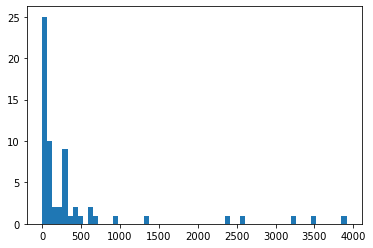

In [10]:
plt.hist(edge_sizes, bins=60) # pomocniczy wykres do ustalenia legendy szerokości krawędzi
plt.show()

In [11]:
node_sizes = migracje_nodes["POPULACJA"] # wielkości wierzchołków
max_node = max(node_sizes)

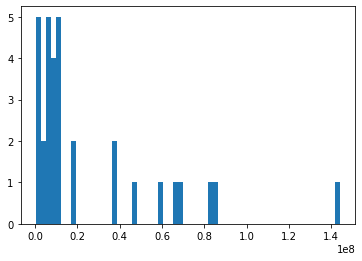

In [12]:
plt.hist(node_sizes, bins=60) # pomocniczy wykres do ustalenia legendy wielkości wierzchołków
plt.show()

In [13]:
# wczytanie danych o kształtach geograficznych świata
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\Ola\AppData\Local\Temp\ipykernel_21708\4084192478.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [14]:
countries_count = len(migracje_nodes["ANG"])
migracje_nodes["POS"] = [(0, 0)] * countries_count # inicjalizacja pustej kolumny do wpisania współrzędnych geograficznych krajów

for i in range (countries_count):
    country = migracje_nodes["ANG"][i]
    country_info = world[world['name'] == country]
    if not country_info.empty:
        migracje_nodes["POS"][i] = (country_info.geometry.centroid.x.values[0], country_info.geometry.centroid.y.values[0])

migracje_nodes.head()

C:\Users\Ola\AppData\Local\Temp\ipykernel_21708\2774035909.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  migracje_nodes["POS"][i] = (country_info.geometry.centroid.x.values[0], country_info.geometry.centroid.y.values[0])
C:\Users\Ola\AppData\Local\Temp\ipykernel_21708\2774035909.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migracje_nodes["POS"][i] = (country_info.geometry.centroid.x.values[0], country_info.geometry.centroid.y.values[0])
C:\Users\Ola\AppData\Local\Temp\ipykernel_21708\2774035909.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projec

,KRAJ,POPULACJA,ANG,POS
0,Polska,36821749,Poland,"(19.31101430844868, 52.14826021933187)"
1,Austria,9041851,Austria,"(14.076158884337072, 47.6139487927463)"
2,Belgia,11685814,Belgium,"(4.580834113854935, 50.65244095902296)"
3,Białoruś,9228071,Belarus,"(27.98135261544803, 53.50634479481114)"
4,Bułgaria,6465097,Bulgaria,"(25.19511095327711, 42.7531187620217)"


In [15]:
# Poprawienie współrzędnych (żeby mniej linii na grafie na siebie nachodziło)
index = migracje_nodes[migracje_nodes['KRAJ'] == 'Francja'].index
migracje_nodes.at[index[0], 'POS'] = (1.4021085520266596, 47.46007176553646)
index = migracje_nodes[migracje_nodes['KRAJ'] == 'Rosja'].index
migracje_nodes.at[index[0], 'POS'] = (35.742812183287235, 57.85246015066262)
index = migracje_nodes[migracje_nodes['KRAJ'] == 'Słowacja'].index
migracje_nodes.at[index[0], 'POS'] = (18.55985926720813, 48.43676897751614)
index = migracje_nodes[migracje_nodes['KRAJ'] == 'Norwegia'].index
migracje_nodes.at[index[0], 'POS'] = (10.610865997203994, 62.83599573561777)
index = migracje_nodes[migracje_nodes['KRAJ'] == 'Wielka Brytania'].index
migracje_nodes.at[index[0], 'POS'] = (-2.7232546304171414, 55.24260430388235)
migracje_nodes

,KRAJ,POPULACJA,ANG,POS
0,Polska,36821749,Poland,"(19.31101430844868, 52.14826021933187)"
1,Austria,9041851,Austria,"(14.076158884337072, 47.6139487927463)"
2,Belgia,11685814,Belgium,"(4.580834113854935, 50.65244095902296)"
3,Białoruś,9228071,Belarus,"(27.98135261544803, 53.50634479481114)"
4,Bułgaria,6465097,Bulgaria,"(25.19511095327711, 42.7531187620217)"
5,Cypr,912703,Cyprus,"(33.03955380295407, 34.90706085094344)"
6,Czechy,10672118,Czechia,"(15.334558102365815, 49.775245294369)"
7,Dania,5903037,Denmark,"(9.876372937675002, 56.06393446179454)"
8,Estonia,1348840,Estonia,"(25.824725613026608, 58.643695426630906)"
9,Finlandia,5556106,Finland,"(26.211764610296353, 64.50409403963651)"


In [16]:
# funkcja do wyodrębniania kształtów danego kontynentu
def shapefile_continent(continent):
    shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
    reader = shpreader.Reader(shpfilename)
    valid_shapes = [record.geometry for record in reader.records() if record.attributes["CONTINENT"] == continent]

    return gpd.GeoSeries(unary_union(valid_shapes))

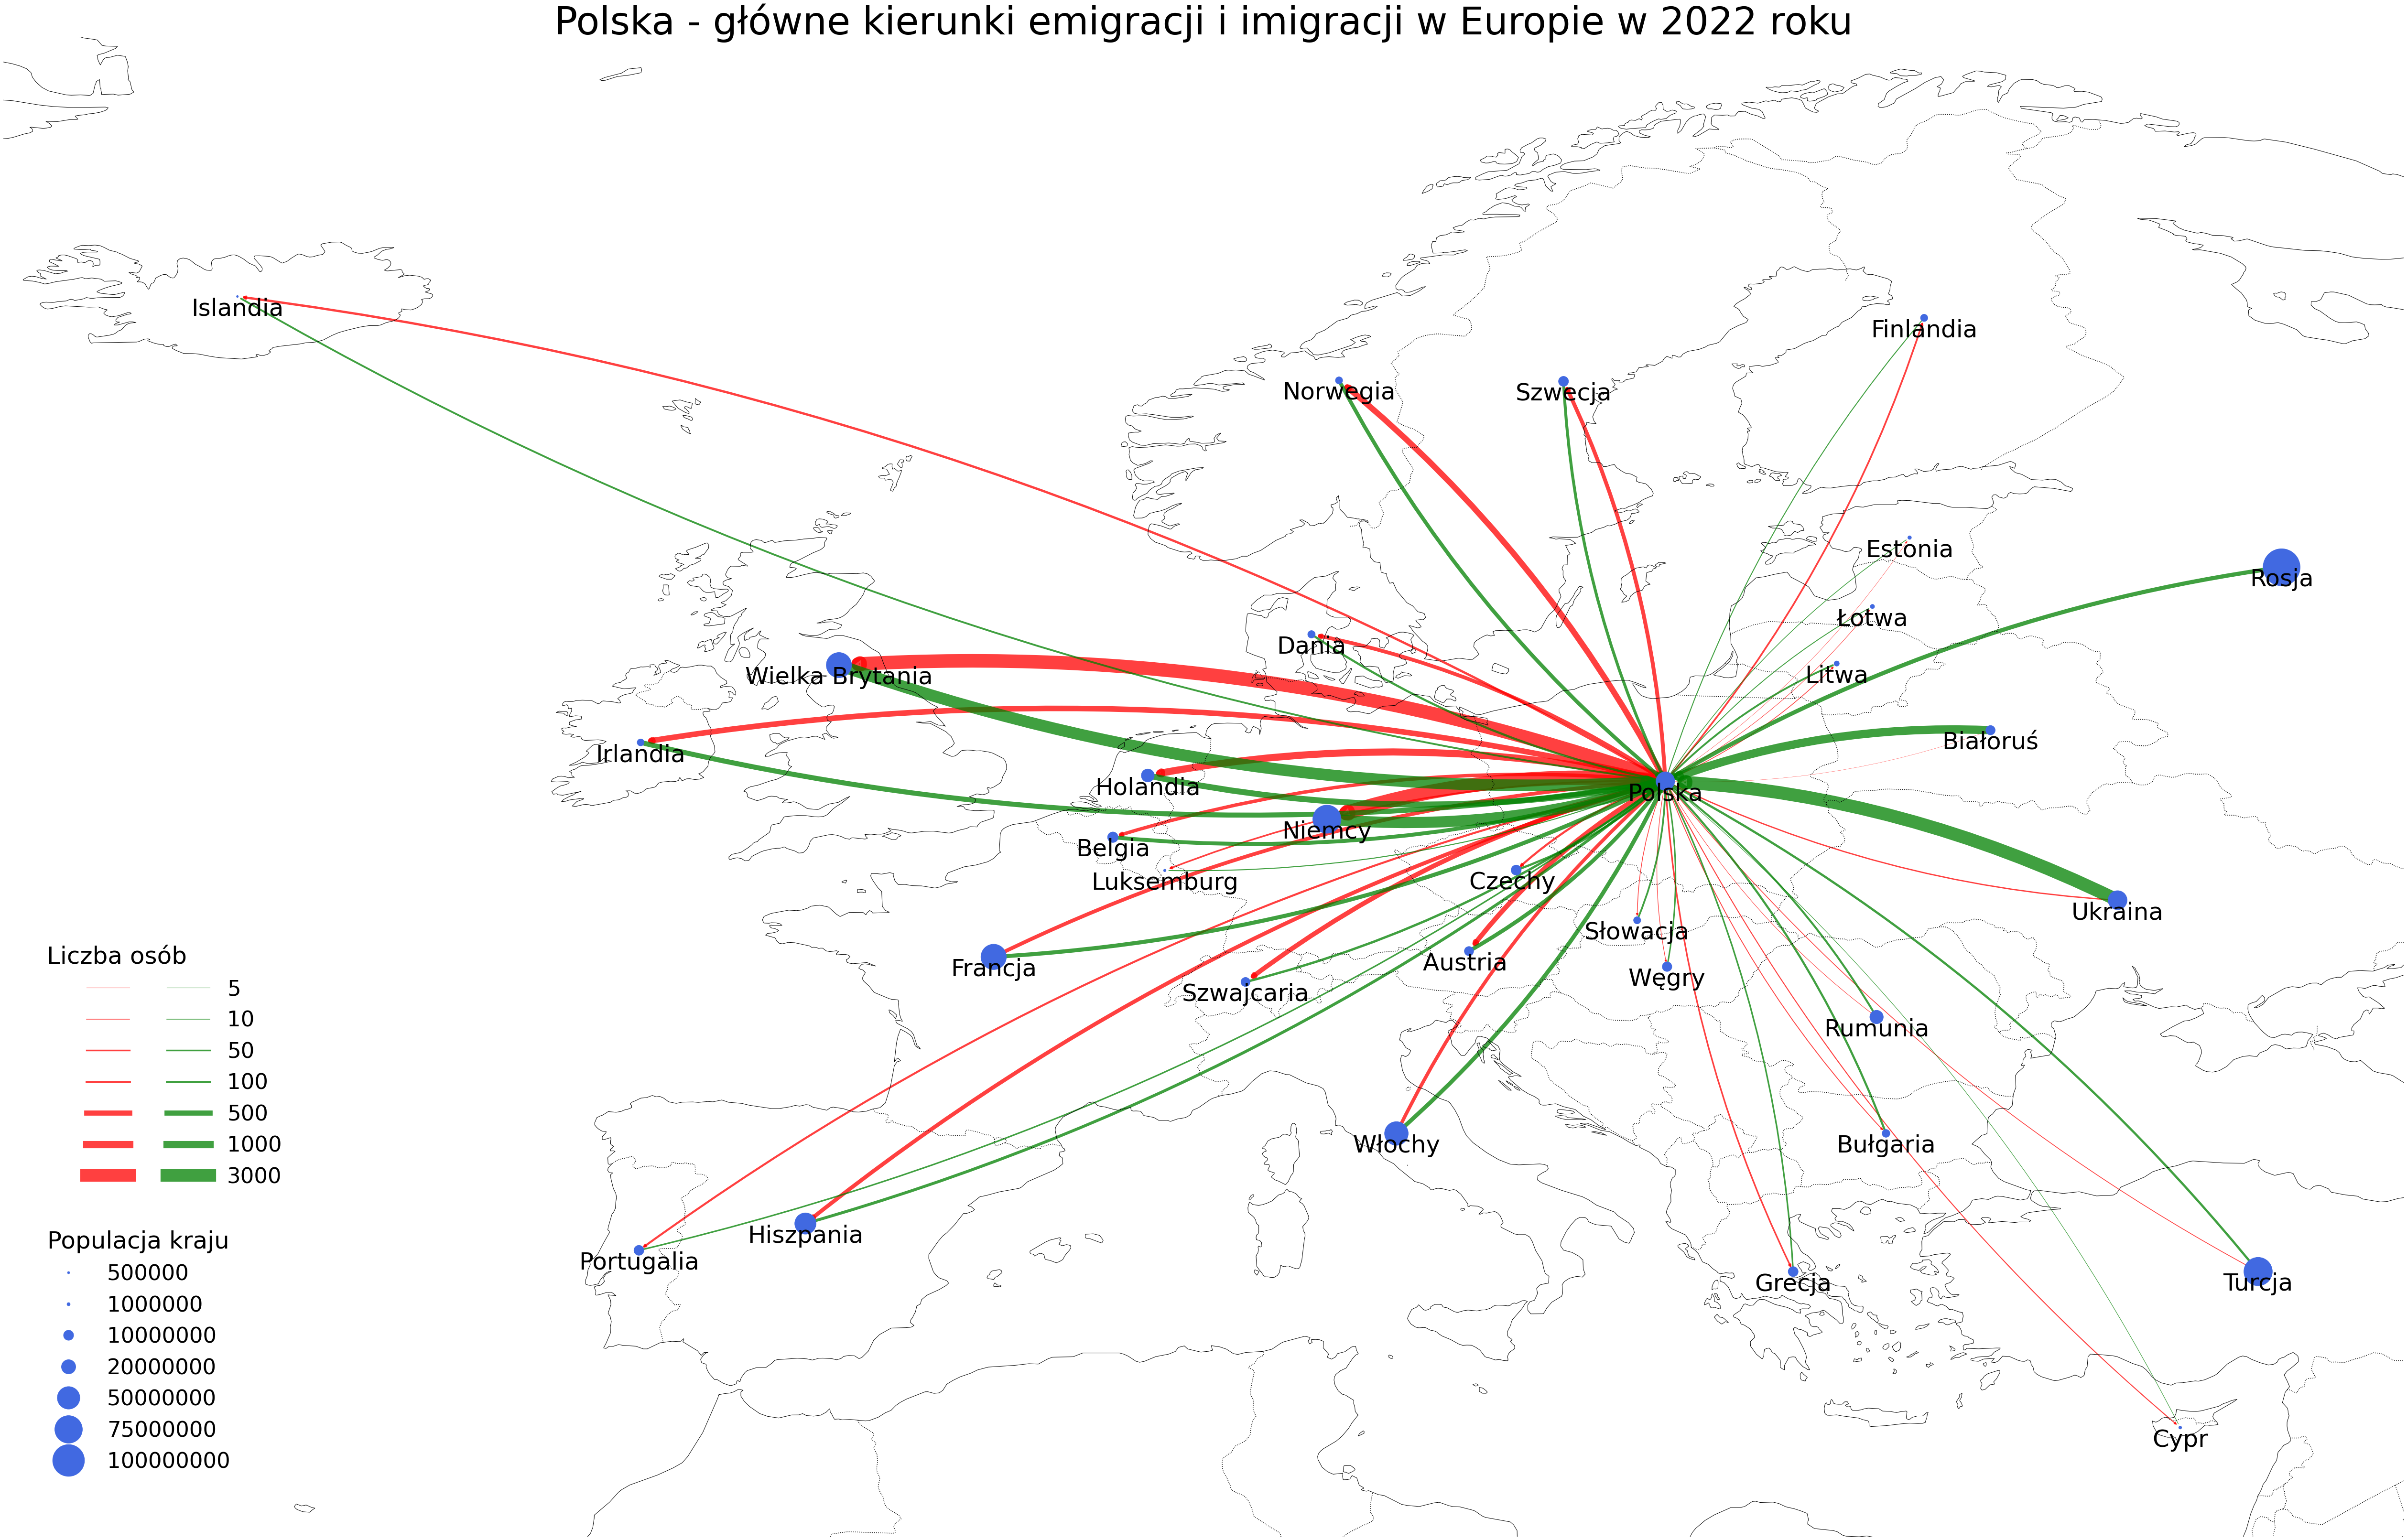

In [18]:
fig = plt.figure(figsize=(90, 80))
fig.set_facecolor('white')

ax_map = plt.subplot(projection=ccrs.PlateCarree())
ax_map.set_global()
ax_map.set_title("Polska - główne kierunki emigracji i imigracji w Europie w 2022 roku", fontsize=80)

# Rysowanie granic państw i linii brzegowej
ax_map.add_feature(cfeature.BORDERS, linestyle=':', edgecolor="Black", linewidth=1.5)
ax_map.add_feature(cfeature.COASTLINE, edgecolor="Black")

pos = dict(zip(migracje_nodes["KRAJ"], migracje_nodes["POS"]))

# Rysowanie kolejnych warstw grafu
nx.draw_networkx_nodes(migracje_digraph, 
    pos=pos,
    ax=ax_map,
    node_size=node_sizes/max_node * 6000, # skalowanie wielkości wierzchołków (kraje w tabeli "migracje_nodes" są w tej samej kolejności co w migracje_digraph.nodes())
    node_color="royalblue"
)

red_color = np.repeat('red', 31)
green_color = np.repeat('green', 31)
colors_vector = np.concatenate((red_color, green_color)) # ustawienie kolorów dla krawędzi: emigracja - czerwony, imigracja - zielony

nx.draw_networkx_edges(migracje_digraph, 
    pos=pos,
    ax=ax_map, 
    connectionstyle='arc3, rad = 0.1', 
    width=(sqrt_edge_sizes / max_sqrt_edge) * 30, # skalowanie szerokości krawędzi
    edge_color=colors_vector,
    alpha=0.75
)

for i, (node, (x, y)) in enumerate(pos.items()):
    ax_map.text(x, y - 0.02, node, fontsize=50, ha="center", va="top") # podpisy wierzchołków

ax_map.set_xlim([-25, 39])  # ustawienie zakresu krawędzi mapy
ax_map.set_ylim([32, 72])

# Tworzenie legend
red_edges_handles = [plt.Line2D([], [], color='red', alpha=0.75, linewidth=(np.sqrt(w) / max_sqrt_edge) * 30) 
                for w in [5, 10, 50, 100, 500, 1000, 3000]]

red_edges_legend = ax_map.legend(handles=red_edges_handles, title="Liczba osób", title_fontsize=50, frameon=False, bbox_to_anchor=(0.01, 0.22), loc = "lower left", fontsize=45)

green_edges_handles = [plt.Line2D([], [], color='green', alpha=0.75, linewidth=(np.sqrt(w) / max_sqrt_edge) * 30, label=w) 
                for w in [5, 10, 50, 100, 500, 1000, 3000]]

green_edges_legend = ax_map.legend(handles=green_edges_handles, frameon=False, bbox_to_anchor=(0.06, 0.22), loc = "lower left", fontsize=45)

node_size_handles = [plt.Line2D([], [], marker='o', color='royalblue', label=str(w), markersize=np.sqrt(w / max_node) * 80, linestyle='None', markerfacecolor='royalblue') 
                for w in [500000, 1000000, 10000000, 20000000, 50000000, 75000000, 100000000]]

ax_map.legend(handles=node_size_handles, title="Populacja kraju", title_fontsize=50, frameon=False, bbox_to_anchor=(0.01, 0.03), loc='lower left', fontsize=45)

ax_map.add_artist(red_edges_legend) # dodanie z powrotem pierwszej legendy
ax_map.add_artist(green_edges_legend) # dodanie z powrotem drugiej legendy

plt.axis("off")

plt.show()